In [318]:
from zlib import crc32
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [319]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    tip = rs.randint(low=0, high=3) 
    print("my tip is", tip)
    if tip == 0:
        w = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
    if tip == 1:
        w= [1, 1, 1, 1, 1, 0, 0, 0, 0, 0][::-1]
    if tip == 2:
        w = [0]*10
    print("my coefficients are", w)
    x = rs.randn(1000, 10)    
    y = np.dot(x, w) + rs.randn(1000)*0.0001
    y[100:] += 10*rs.randn(900)*rs.uniform(size = 900)    
    y -= np.min(y) - 0.01
    return np.hstack([y.reshape(1000,1), x])

In [320]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

#task # yurchenko.aa@phystech.edu

Enter your mail: yurchenko.aa@phystech.edu
my tip is 0
my coefficients are [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [321]:
data = task['data']
data = pd.DataFrame(data)

In [322]:
column_names = ["Y"]+list(map(lambda idx: f"X{idx-1}", data.columns[1:]))
data.columns = column_names
data

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,29.948454,-0.108077,0.073565,-0.739063,-0.641630,0.182864,0.598147,0.924532,-2.038332,-0.177079,0.433530
1,30.900656,1.337107,0.019932,-0.618003,-0.810914,-0.208075,-0.311877,-0.180383,0.587799,1.119815,0.510174
2,32.008953,-0.090716,-1.690525,2.889488,0.463301,-0.743108,-0.078447,0.538421,1.773295,1.111653,1.452203
3,30.453012,0.121320,0.067458,-0.412663,-0.176660,-0.327080,0.574946,0.547133,-0.832182,-2.168758,-2.164167
4,28.515702,-0.203283,-0.799898,0.396551,-1.318746,-0.739434,0.120590,-0.527805,-0.339737,0.398977,0.397435
...,...,...,...,...,...,...,...,...,...,...,...
995,18.071617,-1.460692,-1.063925,-0.412149,-2.597832,-0.246309,0.449440,0.457701,1.465027,0.951335,-0.373555
996,30.807960,-1.836698,0.633145,-0.158628,-0.419342,-0.519462,-0.480677,0.199614,1.196476,-0.439154,0.402727
997,27.989149,0.446594,1.000139,0.889586,-0.555495,0.556500,-1.093196,-1.652624,-0.328317,-0.920418,-0.015413
998,21.542390,-0.024348,-1.444288,0.915267,-0.606401,0.962993,1.603586,1.147910,-0.017891,0.735947,-0.194602


In [323]:
X = data.iloc[:, 1:] # data.drop(columns="Y")
Y = data.iloc[:, 0] # data["Y"]

### Постройте линейную модель Y от X и свободного коэффициента. Проверьте, есть ли гетероскедастичность в выборке с использованием критерия Бройша-Пагана (использовать F-test, см. справку по критерию) 

In [324]:
formula = 'Y ~ ' + ' + '.join(data.columns[1:]) + ' + 1'
formula

'Y ~ X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 1'

In [325]:
model_1 = OLS.from_formula(formula, data).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     15.73
Date:                Sun, 17 Apr 2022   Prob (F-statistic):           1.90e-26
Time:                        20:59:25   Log-Likelihood:                -3083.8
No. Observations:                1000   AIC:                             6190.
Df Residuals:                     989   BIC:                             6244.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9093      0.169    183.308      0.000      30.578      31.240
X0             0.8386      0.165      5.092      0.000       0.515       1.162
X1             0.8336      0.167      5.006      0.000       0.507       1.160
X2             0.9323      0.163      5.736      0.000       0.613       1.251
X3             0.6422      0.163      3.932      0.000       0.322       0.963
X4             1.3311      0.172      7.726      0.000       0.993       1.669
X5             0.0375      0.169      0.222      0.824      -0.294       0.369
X6            -0.1600      0.171     -0.936      0.350      -0.495       0.176
X7             0.0202      0.164      0.123      0.902      -0.302       0.342
X8            -0.0003      0.170     -0.002      0.999      -0.333       0.332
X9            -0.1190      0.169     -0.704      0.482      -0.451       0.213
==============================================================================
Omnibus:                       86.722   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              449.245
Skew:                          -0.170   Prob(JB):                     2.80e-98
Kurtosis:                       6.266   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
het_breuschpagan(model_1.resid, X, robust=True) # последнее возвращаемое значение: p-value for the f-statistic

(6.729896359066956, 0.6652176493220276, 0.6707739789060262, 0.7523174295599653)

In [327]:
# The tests the hypothesis that the residual variance does not depend on the variables in x in the form
het_breuschpagan(model_1.resid, X, robust=True)[-1] > 0.05 # проверка на гетероскедастичность 

True

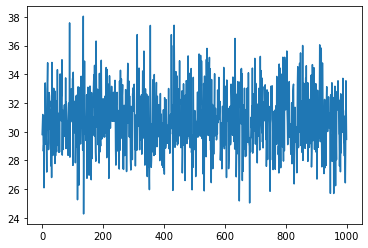

In [328]:
_ = plt.plot(Y - model_1.resid)

Гетероскедастичности нет. На это указывают p-value > 0.05 и график

### Оптимальное значение lambda для преобразования Бокса-Кокса на переменную Y (использовать scipy.stats) 

In [329]:
_, l = st.boxcox(Y)
print('optimal lambda = {:.3f}'.format(l))

optimal lambda = 1.162


### Постройте линейную модель Y от X и свободного коэффициента для первых 100 элементов выборки. Сколько переменных являются избыточными согласно t-критерию? Поправку на множественность гипотез проигнорировать 

In [330]:
model_2 = OLS.from_formula(formula, data.iloc[:100]).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.173e+09
Date:                Sun, 17 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:59:27   Log-Likelihood:                 785.26
No. Observations:                 100   AIC:                            -1549.
Df Residuals:                      89   BIC:                            -1520.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.1806   1.06e-05   2.94e+06      0.000      31.181      31.181
X0             1.0000   1.05e-05    9.5e+04      0.000       1.000       1.000
X1             1.0000   1.16e-05    8.6e+04      0.000       1.000       1.000
X2             1.0000   1.01e-05   9.91e+04      0.000       1.000       1.000
X3             1.0000   1.04e-05   9.59e+04      0.000       1.000       1.000
X4             1.0000    1.1e-05    9.1e+04      0.000       1.000       1.000
X5          1.327e-05    1.1e-05      1.201      0.233   -8.68e-06    3.52e-05
X6          2.745e-06   1.04e-05      0.265      0.792   -1.79e-05    2.33e-05
X7          2.668e-06    9.8e-06      0.272      0.786   -1.68e-05    2.21e-05
X8          1.025e-05   1.15e-05      0.889      0.376   -1.27e-05    3.32e-05
X9          -1.12e-07   9.25e-06     -0.012      0.990   -1.85e-05    1.83e-05
==============================================================================
Omnibus:                        0.247   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.046
Skew:                           0.040   Prob(JB):                        0.977
Kurtosis:                       3.067   Cond. No.                         1.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5 последних переменных являются избыточными так как для них P>|t| больше 0.05 (в таблице)

### Имеет ли смысл данная модель согласно F-критерию? 

In [331]:
def find_p_value(result):
    p_value = re.findall(r'(p=\d\.\d+([e][-]\d+)?)', result)[0][0][2:]
    return float(p_value)

In [332]:
zero_all = ' = '.join(data.columns[1:]) + ' = 0'
zero_all

'X0 = X1 = X2 = X3 = X4 = X5 = X6 = X7 = X8 = X9 = 0'

In [333]:
result_1 = model_2.f_test(zero_all).summary()

In [334]:
find_p_value(result_1) > 0.05

False

p-value < 0.05, Отвергается гипотеза о том, что все коэффициенты равны 0. Модель имеет смысл.

### Можно ли обнулить первые четыре переменные согласно критерию Вальда?

In [335]:
zero_first_four = ' = '.join(data.columns[1:5]) + ' = 0'
zero_first_four

'X0 = X1 = X2 = X3 = 0'

In [336]:
result_2 = model_2.wald_test(zero_first_four).summary()
find_p_value(result_2) > 0.05

False

p-value < 0.05, Отвергается гипотеза о том, что первые 4 коэффициента равны 0 - их нельзя занулить.

In [317]:
# для модели, включающей все перемнные (напрямую не относится к заданию)
result_3 = model_1.wald_test(zero_first_four).summary()
print(find_p_value(result_3))
find_p_value(result_3) > 0.05

1.2590526277079279e-19


False